# MOF ChemUnity Property Extraction

This notebook demonstrates how the property extraction in MOF ChemUnity is used. You need to have the MOF name that you want to extract properties for which is obtained from the Matching workflow.

In [2]:
from src.MOF_ChemUnity.Agents.ExtractionAgent import ExtractionAgent
from src.MOF_ChemUnity.utils.DataPrep import Data_Prep
from src.MOF_ChemUnity.Extraction_Prompts import VERIFICATION, RECHECK, EXTRACTION
from src.MOF_ChemUnity.Water_Stability_Prompts import WATER_STABILITY, RULES_WATER_STABILITY, VERF_RULES_WATER_STABILITY, WATER_STABILITY_RE

### Preparation of MOF Names from Matching CSV

we need to read the matching csv file and extract the file names from within that.

In [1]:
import pandas as pd
import glob
import os

In [33]:
mof_names_df = pd.read_csv("./tests/water_stability_benchmark/case-study-3-ground-truth.csv")
mof_names_df.head()

,Reference,DOI,MOF contained,True Water Stability,Justification Sentence,Unnamed: 5
0,1,10.1038/s41586-019-1798-7,Al-PMOF/m8o66,Stable,The capture capacity of Al-PMOF for a mixture ...,NaN
1,1,10.1038/s41586-019-1798-7,Al-PyrMOF/m8o67,Stable,The capture capacity of Al-PyrMOF for a mixtur...,NaN
2,1,10.1038/s41586-019-1798-7,UiO-66-NH2,Not provided,Not provided,NaN
3,1,10.1038/s41586-019-1798-7,m8o71,Unstable,"Conversely, m8o71 completely loses its CO2 cap...",NaN
4,2,10.1039/c0dt00999g,[Zn4(dmf)(ur)2(ndc)4],Stable,The high stability of the guest-free metal–org...,NaN


### Markdown files setup

In [34]:
input_folder = "./tests/water_stability_benchmark/markdown"


files = glob.glob(input_folder+"/*/*.md")

In [35]:
mof_names_df["File"] = [input_folder+f"/{i}/{i}.md" for i in list(mof_names_df["Reference"])]
mof_names_df.head()

,Reference,DOI,MOF contained,True Water Stability,Justification Sentence,Unnamed: 5,File
0,1,10.1038/s41586-019-1798-7,Al-PMOF/m8o66,Stable,The capture capacity of Al-PMOF for a mixture ...,NaN,./tests/water_stability_benchmark/markdown/1/1.md
1,1,10.1038/s41586-019-1798-7,Al-PyrMOF/m8o67,Stable,The capture capacity of Al-PyrMOF for a mixtur...,NaN,./tests/water_stability_benchmark/markdown/1/1.md
2,1,10.1038/s41586-019-1798-7,UiO-66-NH2,Not provided,Not provided,NaN,./tests/water_stability_benchmark/markdown/1/1.md
3,1,10.1038/s41586-019-1798-7,m8o71,Unstable,"Conversely, m8o71 completely loses its CO2 cap...",NaN,./tests/water_stability_benchmark/markdown/1/1.md
4,2,10.1039/c0dt00999g,[Zn4(dmf)(ur)2(ndc)4],Stable,The high stability of the guest-free metal–org...,NaN,./tests/water_stability_benchmark/markdown/2/2.md


### Running the Extraction Loop for General Property Extraction + CoV

In [36]:
with open(".apikeys", 'r') as f:
    os.environ["OPENAI_API_KEY"] = f.read()

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o", temperature=0.1)
parser_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

In [37]:
result = {}
result["MOF Name"] = []
result["Ref Code"] = []
result["Property"] = []
result["Value"] = []
result["Units"] = []
result["Condition"] = []
result["Summary"] = []
result["Reference"] = []

In [38]:
filtered_result = {}
filtered_result["MOF Name"] = []
filtered_result["Ref Code"] = []
filtered_result["Property"] = []
filtered_result["Value"] = []
filtered_result["Units"] = []
filtered_result["Condition"] = []
filtered_result["Summary"] = []
filtered_result["Reference"] = []

In [39]:
ws_result = {}
ws_result["MOF Name"] = []
ws_result["Ref Code"] = []
ws_result["Property"] = []
ws_result["Value"] = []
ws_result["Units"] = []
ws_result["Condition"] = []
ws_result["Summary"] = []
ws_result["Reference"] = []

In [40]:
WS_READ = WATER_STABILITY.replace("{RULES}", RULES_WATER_STABILITY)
WS_CHECK = VERIFICATION.replace("{VERF_RULES}", VERF_RULES_WATER_STABILITY)
WS_RECHECK = RECHECK.replace("{RECHECK_INSTRUCTIONS}", WATER_STABILITY_RE.replace("{RULES}", RULES_WATER_STABILITY))

sp_dict = {"read_prompts": [WS_READ], "verification_prompts": [WS_CHECK], "recheck_prompts": [WS_RECHECK]}

In [41]:
from src.MOF_ChemUnity.utils.DocProcessor import DocProcessor

agent = ExtractionAgent(llm=llm)

In [43]:
for i in range(len(mof_names_df)):

    mof = mof_names_df.iloc[i]["MOF contained"].replace("{", "[").replace("}", "]")
    refcode = "HELLOW"
    reference = mof_names_df.iloc[i]["DOI"]
    
    _, response = agent.agent_response(mof, mof_names_df.iloc[i]["File"],
                                    EXTRACTION, ["Water Stability"], sp_dict, CoV=True, skip_general=True, fuzz_threshold=85, store_vs=True)
    
    # general_extraction = response

    # filtered = general_extraction[0]
    # all_props = general_extraction[1]

    # print(filtered)
    # print(all_props)

    # for j in filtered:
    #     filtered_result["MOF Name"].append(mof)
    #     filtered_result["Ref Code"].append(refcode)
    #     filtered_result["Reference"].append(reference)
    #     filtered_result["Property"].append(j.name)
    #     filtered_result["Units"].append(j.units)
    #     filtered_result["Value"].append(j.value)
    #     filtered_result["Condition"].append(j.condition)
    #     filtered_result["Summary"].append(j.summary)
    # for j in all_props.properties:
    #     result["MOF Name"].append(mof)
    #     result["Ref Code"].append(refcode)
    #     result["Reference"].append(reference)
    #     result["Property"].append(j.name)
    #     result["Units"].append(j.units)
    #     result["Value"].append(j.value)
    #     result["Condition"].append(j.condition)
    #     result["Summary"].append(j.summary)
    
    specific_extraction = response

    ws = specific_extraction[0]

    for j in ws:
        ws_result["MOF Name"].append(mof)
        ws_result["Ref Code"].append(refcode)
        ws_result["Reference"].append(reference)
        ws_result["Property"].append(j.name)
        ws_result["Units"].append(j.units)
        ws_result["Value"].append(j.value)
        ws_result["Condition"].append(j.condition)
        ws_result["Summary"].append(j.summary)



# all_props = pd.DataFrame(result)
# filtered = pd.DataFrame(filtered_result)
ws = pd.DataFrame(ws_result)
    

Saved vector store for ./tests/water_stability_benchmark/markdown/1/1.md in ./tests/water_stability_benchmark/markdown/vs/1
Reading to find the Water Stability of Al-PMOF/m8o66 specifically
LLM Structured Output: 
Water Stability = StableN/A ; conditions:  ; Justification: "Figure 3c, d shows no loss of crystallinity upon activation as well as upon exposure to different harsh conditions, including immersion in water for 7 days." "The ability of these materials to capture CO2 from wet flue gases is of important practical concern. We therefore used a breakthrough experiment to determine the capture capacity of both Al-PMOF and Al-PyrMOF for a mixture of CO2/N2 under dry- and humid-conditions." "These results confirm the predictions of the simulations (Extended Data Fig. 7): humidity in the flue gases has only a minimal influence on the capture capacity of Al-PMOF."

Verifying the extraction:
Saved vector store for ./tests/water_stability_benchmark/markdown/1/1.md in ./tests/water_stabili

KeyboardInterrupt: 

In [25]:
ws = pd.DataFrame(ws_result)

In [30]:
ws.to_csv("/mnt/c/Users/Amro/Desktop/ws_no_hallucination_slightly_bettter_prompt_hope_for_the_best.csv")

## Performance Metrics

In [2]:
case_3 = pd.read_csv("./tests/water_stability_benchmark/case-study-3-ground-truth.csv")
case_3.head()

,Reference,DOI,MOF contained,True Water Stability,Justification Sentence,Unnamed: 5
0,1,10.1038/s41586-019-1798-7,Al-PMOF/m8o66,Stable,The capture capacity of Al-PMOF for a mixture ...,NaN
1,1,10.1038/s41586-019-1798-7,Al-PyrMOF/m8o67,Stable,The capture capacity of Al-PyrMOF for a mixtur...,NaN
2,1,10.1038/s41586-019-1798-7,UiO-66-NH2,Not provided,Not provided,NaN
3,1,10.1038/s41586-019-1798-7,m8o71,Unstable,"Conversely, m8o71 completely loses its CO2 cap...",NaN
4,2,10.1039/c0dt00999g,[Zn4(dmf)(ur)2(ndc)4],Stable,The high stability of the guest-free metal–org...,NaN


In [ ]:
ws = pd.read_csv("/mnt/c/Users/Amro/Desktop/ws_no_hallucination.csv")

In [ ]:
ws = pd.read_csv("/mnt/c/Users/Amro/Desktop/ws.csv")

In [3]:
results_df = pd.read_csv("./tests/water_stability_benchmark/ws_no_hallucination_slightly_bettter_prompt_hope_for_the_best.csv")
ws = results_df

In [5]:
ws24_benchmark = pd.read_csv("./ws24_benchmark_results.csv")

In [12]:
import numpy as np

incorrect = {"MOF contained": [], "Reference": [], "DOI": [], "True Label": [], "True Justification": [], "LLM Label": [], "LLM Justification": []}

matrix = np.zeros((3,3))
for i in range(len(ws)):
    y_index = 0
    x_index = 0

    if(case_3.iloc[i]["True Water Stability"].lower() == "unstable"): y_index = 0
    elif(case_3.iloc[i]["True Water Stability"].lower() == "stable"): y_index = 1 
    else: y_index = 2
    if(ws.iloc[i]["Value"].lower() == "unstable"): x_index = 0
    elif(ws.iloc[i]["Value"].lower() == "stable"): x_index = 1 
    else: x_index = 2

    if (y_index == 2 and x_index == 0) or (y_index == 1 and x_index == 0) or (y_index == 2 and x_index == 1) or (y_index == 1 and x_index == 2) or (y_index == 0 and x_index == 1):
        incorrect["MOF contained"].append(case_3.iloc[i]["MOF contained"])
        incorrect["DOI"].append(case_3.iloc[i]["DOI"])
        incorrect["Reference"].append(case_3.iloc[i]["Reference"])
        incorrect["True Label"].append(case_3.iloc[i]["True Water Stability"])
        incorrect["True Justification"].append(case_3.iloc[i]["Justification Sentence"])
        incorrect["LLM Label"].append(ws.iloc[i]["Value"])
        incorrect["LLM Justification"].append(ws.iloc[i]["Summary"])

    matrix[y_index, x_index] += 1

add_ws24 = True
for i in range(len(ws24_benchmark)):
    chemunity = ws24_benchmark.loc[i, "ChemUnity Stability"]
    ws24 = ws24_benchmark.loc[i, "WS Stability"]

    if chemunity.lower() == "stable":
        chemunity_index = 1
    else:
        chemunity_index = 0
    
    if ws24.lower() == "stable":
        ws_index = 1
    else:
        ws_index = 0
    
    if add_ws24:
        matrix[ws_index, chemunity_index] += 1

In [13]:
recall = np.zeros(3)
precision = np.zeros(3)
false_positives = np.zeros(3)
false_negatives = np.zeros(3)
true_positives = np.zeros(3)


for k in range(3):
    for i in range(3):
        if i != k:
            false_positives[k] += matrix[i, k]
            false_negatives[k] += matrix[k, i]

    true_positives[k] += matrix[k,k]
    precision[k] = matrix[k,k]/(matrix[k,k] + false_positives[k])
    recall[k] = matrix[k,k]/(matrix[k,k] + false_negatives[k])

micro_precision = np.sum(true_positives)/(np.sum(true_positives)+np.sum(false_positives))
micro_recall = np.sum(true_positives)/(np.sum(true_positives)+np.sum(false_negatives))


In [14]:
print("\t\t\tPred. Unstable\tPred. Stable\tNP\n\tTrue Unstable\t\t{0}\t{1}\t\t{2}\n\tTrue Stable\t\t{3}\t{4}\t\t{5}\n\tNP\t\t\t{6}\t{7}\t\t{8}".format(*matrix.flatten()))
print("Accuracy: {0:0.00%}\n".format(np.sum([matrix[i,i] for i in range(3)])/np.sum(matrix)))
print("Recalls: Unstable {0:0.00%}\t\tStable {1:0.00%}\t\tNot Provided {2:0.00%}".format(*recall.flatten()))
print("Precision: Unstable {0:0.00%}\t\tStable {1:0.00%}\t\tNot Provided {2:0.00%}".format(*precision.flatten()))

			Pred. Unstable	Pred. Stable	NP
	True Unstable		64.0	10.0		4.0
	True Stable		32.0	165.0		29.0
	NP			9.0	3.0		197.0
Accuracy: 83%

Recalls: Unstable 82%		Stable 73%		Not Provided 94%
Precision: Unstable 61%		Stable 93%		Not Provided 86%


In [8]:
incorrect = pd.DataFrame(incorrect)

In [40]:
incorrect.to_csv("./wrong_stuff.csv")

In [15]:
import matplotlib.pyplot as plt

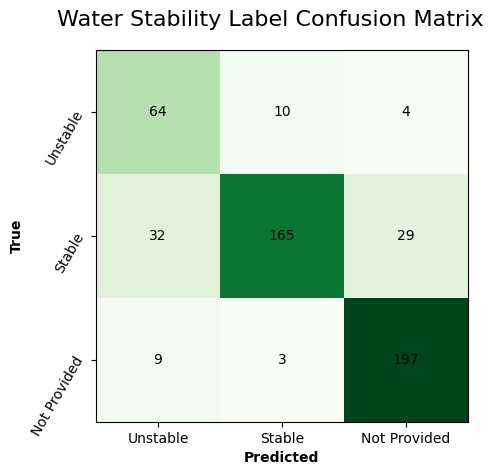

In [16]:
fig, ax = plt.subplots()
ax.imshow(matrix, cmap="Greens", interpolation="nearest")
fig.suptitle("Water Stability Label Confusion Matrix", fontsize=16)
ax.set_xticks(ticks=np.arange(3), labels=["Unstable", "Stable", "Not Provided"], fontsize=10)
ax.set_yticks(ticks=np.arange(3), labels=["Unstable", "Stable", "Not Provided"], fontsize=10, rotation=60)
ax.set_xlabel("Predicted", fontsize=10, fontweight="bold")
ax.set_ylabel("True", fontsize=10, fontweight="bold")

for j in range(3):
    for i in range(3):
        ax.text(j, i, f"{matrix[i,j]:0n}", ha="center", va="center", color="black")

plt.tight_layout(rect=[0,0,1,1])

(0.0, 1.0)

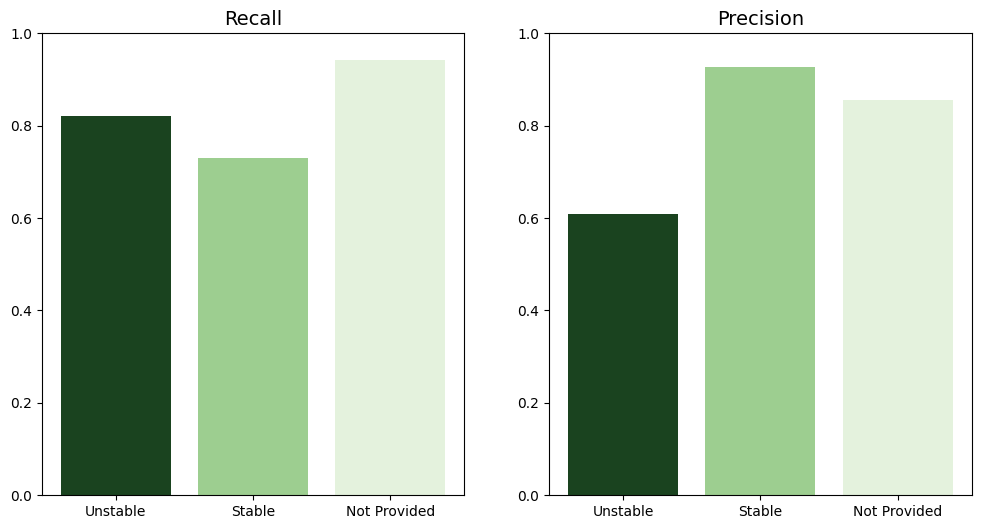

In [17]:
categories = ["Unstable", "Stable", "Not Provided"]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.set_title("Recall", fontsize=14)
ax1.bar(categories, recall, color=['#1a431f', "#9dce90", "#e4f2dd"])
ax1.set_ylim([0, 1])


ax2.set_title("Precision", fontsize=14)
ax2.bar(categories, precision, color=['#1a431f', "#9dce90", "#e4f2dd"])
ax2.set_ylim([0, 1])